# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from IPython.display import display

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

dftrain = pd.read_csv("train.csv", engine='python')
dftest = pd.read_csv("test.csv", engine='python')
print(dftrain.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [3]:
# dftest.head()

In [4]:
# dftrain.shape

In [5]:
# dftrain.sample(10)

In [6]:
# dftrain.info(5)

In [7]:
# dftrain['SalePrice'].head()

In [8]:
# report = pandas_profiling.ProfileReport(dftrain)
# report

In [9]:
# df_num = dftrain.select_dtypes(include = ['float64', 'int64'])
# df_num.head()

In [10]:
# df_object = dftrain.select_dtypes(include = ['object'])
# df_num.head()

In [11]:
# df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
# golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
# print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

In [12]:
# dftrain['AreaBin'] = pd.cut(dftrain.LotArea, 20, labels=False)
# # Using another column other than age is also OK because we just need the count
# X = dftrain.groupby('AreaBin')[['LotArea', 'LotFrontage']].agg({'LotArea':'mean', 'LotFrontage':'count'})
# X.columns = ['LotArea', 'count']

In [13]:
# for i in range(0, len(df_num.columns), 5):
#     sns.pairplot(data=df_num,
#                 x_vars=df_num.columns[i:i+5],
#                 y_vars=['SalePrice'])

In [14]:
# print(dftrain['SalePrice'].describe())
# plt.figure(figsize=(9, 8))
# sns.distplot(dftrain['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [15]:
##SalePrice distribution, and normalized
##Probability plot, and normalized

# from scipy import stats
# from scipy.stats import norm, skew #for some statistics

# # Plot histogram and probability
# fig = plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.distplot(df_num['SalePrice'] , fit=norm);
# (mu, sigma) = norm.fit(df_num['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')
# plt.subplot(1,2,2)
# res = stats.probplot(df_num['SalePrice'], plot=plt)
# plt.suptitle('Before transformation')

# # Apply transformation
# df_num.SalePrice = np.log1p(df_num.SalePrice)
# # New prediction
# y_train = df_num.SalePrice.values
# y_train_orig = df_num.SalePrice


# # Plot histogram and probability after transformation
# fig = plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.distplot(df_num['SalePrice'] , fit=norm);
# (mu, sigma) = norm.fit(df_num['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')
# plt.subplot(1,2,2)
# res = stats.probplot(df_num['SalePrice'], plot=plt)
# plt.suptitle('After transformation')

In [16]:
# np.unique(dftrain.dtypes)

In [17]:
# train_float = dftrain.select_dtypes(include = ['float64'])
# test_float = dftest.select_dtypes(include = ['float64'])
# train_float.dtypes

In [18]:
# #heatmap correlation matrix
# corrmat = dftrain.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

In [19]:
# dftrain_corr = dftrain.select_dtypes(include=[np.number])

In [20]:
# dftrain_corr.shape

In [21]:
# del dftrain_corr['Id']

In [22]:
# corr = dftrain_corr.corr()
# plt.subplots(figsize=(20,9))
# sns.heatmap(corr, annot=True)

In [23]:
# ##Top 50 corr
# top_feature = corr.index[abs(corr['SalePrice']>0.5)]
# plt.subplots(figsize=(12, 8))
# top_corr = dftrain[top_feature].corr()
# sns.heatmap(top_corr, annot=True)
# plt.show()

# Cleaning data

In [24]:
# dftrain.shape

In [25]:
# dftrain.isna().sum().head()

In [26]:
# Proportion of NaNs within columns
Isnull = dftrain.isnull().sum()/len(dftrain)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

PoolQC         99.521
MiscFeature    96.301
Alley          93.767
Fence          80.753
FireplaceQu    47.260
LotFrontage    17.740
GarageYrBlt     5.548
GarageType      5.548
GarageFinish    5.548
GarageQual      5.548
GarageCond      5.548
BsmtFinType2    2.603
BsmtExposure    2.603
BsmtFinType1    2.534
BsmtCond        2.534
BsmtQual        2.534
MasVnrArea      0.548
MasVnrType      0.548
Electrical      0.068
dtype: float64

In [27]:
print("Most important features to SalePrice")
corr = dftrain.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Most important features to SalePrice
SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
BsmtFinSF1       0.386
LotFrontage      0.352
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
Id              -0.022
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64


# Data Cleaning

Run from here

Dropping columns and rows

In [28]:
# Dropping Utilities; is useless
dftrain.drop(['Utilities'], axis=1,inplace=True)

In [29]:
# Dropping 'PoolQC' for having too many NaNs; 
dftrain.drop(['PoolQC'],axis=1,inplace=True)

In [30]:
# Dropping 'Fence' for having too many NaNs; 
dftrain.drop(['Fence'],axis=1,inplace=True)

In [31]:
# Dropping MiscFeature' for having too many NaNs; 
dftrain.drop(['MiscFeature'],axis=1,inplace=True)

In [32]:
# Dropping 'Alley' for same reason
dftrain.drop(['Alley'],axis=1,inplace=True)

In [33]:
# Dropping 'GarageYrBlt' - highly colinear with 'YearBuilt'; also has many NaNs
dftrain.drop(['GarageYrBlt'],axis=1,inplace=True)

In [34]:
# Dropping Id; is useless
dftrain.drop(['Id'],axis=1,inplace=True)

In [35]:
# Dropping outliers
dftrain = dftrain[dftrain.GrLivArea < 4000]

In [36]:
# Checking the shape
dftrain.shape

(1456, 74)

# Imputing values

In [37]:
# Imputing BsmtCond and BsmtQual by mode
dftrain['BsmtCond']=dftrain['BsmtCond'].fillna(dftrain['BsmtCond'].mode()[0])
dftrain['BsmtQual']=dftrain['BsmtQual'].fillna(dftrain['BsmtQual'].mode()[0])

In [38]:
# GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
# for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
#     dftrain[col] = dftrain[col].fillna('None')
# Revised approach: imputing garage variables
dftrain['GarageFinish']=dftrain['GarageFinish'].fillna(dftrain['GarageFinish'].mode()[0])
dftrain['GarageQual']=dftrain['GarageQual'].fillna(dftrain['GarageQual'].mode()[0])
dftrain['GarageCond']=dftrain['GarageCond'].fillna(dftrain['GarageCond'].mode()[0])
dftrain['GarageType']=dftrain['GarageType'].fillna(dftrain['GarageType'].mode()[0])

In [39]:
## 'FireplaceQu' comes in under the 50% NaN threshold for dropping a column; however, will keep this variable in mind when testing. Imputation could skew final result
dftrain['FireplaceQu']=dftrain['FireplaceQu'].fillna(dftrain['FireplaceQu'].mode()[0])

In [40]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
# dftrain['LotFrontage'] = dftrain.groupby("Neighborhood")["LotFrontage"].transform(
#     lambda x: x.fillna(x.median()))
# Reimputing LotFrontage this way:
dftrain['LotFrontage']=dftrain['LotFrontage'].fillna(dftrain['LotFrontage'].mean())

In [41]:
# BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
# for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
#     dftrain[col] = dftrain[col].fillna('None')
# Trying imputation: Filling with 'None' method doesn't work
dftrain['BsmtExposure']=dftrain['BsmtExposure'].fillna(dftrain['BsmtExposure'].mode()[0])
# dftrain['BsmtFinType1']=dftrain['BsmtFinType1'].fillna(dftrain['BsmtFinType1'].mode()[0])
dftrain['BsmtFinType2']=dftrain['BsmtFinType2'].fillna(dftrain['BsmtFinType2'].mode()[0])
dftrain['BsmtQual']=dftrain['BsmtQual'].fillna(dftrain['BsmtQual'].mode()[0])
dftrain['BsmtCond']=dftrain['BsmtCond'].fillna(dftrain['BsmtCond'].mode()[0])

In [42]:
# MasVnrType and MasVnrArea: replace with 0
dftrain['MasVnrArea'] = dftrain['MasVnrArea'].fillna(dftrain['MasVnrArea'].mode()[0])
dftrain['MasVnrType'] = dftrain['MasVnrType'].fillna(dftrain['MasVnrType'].mode()[0])

In [43]:
# Imputing 'Electrical' with mode
# dftrain['Electrical'] = dftrain['Electrical'].fillna(dftrain['Electrical']).mode()[0]

In [44]:
# GarageYrBlt, GarageArea and GarageCars these are replacing with zero
# for col in ['GarageArea', 'GarageCars']:
#     dftrain[col] = dftrain[col].fillna(int(0))

In [45]:
# Checking shape
dftrain.shape

(1456, 74)

In [46]:
# Proportion of NaNs within columns
Isnull = dftrain.isnull().sum()/len(dftrain)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

BsmtFinType1   2.541
Electrical     0.069
dtype: float64

In [47]:
# Dropping final NaNs
dftrain.dropna(inplace=True)

In [48]:
dftrain.shape

(1418, 74)

In [49]:
##Proportion of NaNs within columns; checking to be sure NaNs are gone
Isnull = dftrain.isnull().sum()/len(dftrain)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

Series([], dtype: float64)

In [50]:
# Branching here because dummification of 

In [51]:
# Writes the current form of our dataset to 'RFtest.csv' to use in RandomForest.ipynb
dftrain.to_csv('RFtest.csv',index=False)

In [86]:
dftrain.GarageQual

0       TA
1       TA
2       TA
3       TA
4       TA
5       TA
6       TA
7       TA
8       Fa
9       Gd
10      TA
11      TA
12      TA
13      TA
14      TA
15      TA
16      TA
18      TA
19      TA
20      TA
21      TA
22      TA
23      TA
24      TA
25      TA
26      TA
27      TA
28      TA
29      Fa
30      TA
        ..
1430    TA
1431    TA
1432    Fa
1433    TA
1434    TA
1435    TA
1436    TA
1437    TA
1438    TA
1439    TA
1440    TA
1441    TA
1442    TA
1443    Fa
1444    TA
1445    TA
1446    TA
1447    TA
1448    Fa
1449    TA
1450    TA
1451    TA
1452    TA
1453    TA
1454    TA
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1418, dtype: object

# Feature Engineering

In [53]:
# Total square footage of each house
dftrain['TotalSF'] = dftrain['TotalBsmtSF'] + dftrain['1stFlrSF'] + dftrain['2ndFlrSF']
# Total bathrooms, house and basement
dftrain['TotalBathrooms'] = (dftrain['FullBath'] + (0.5 * dftrain['HalfBath']) + dftrain['BsmtFullBath'] + (0.5 * dftrain['BsmtHalfBath']))
# The porch and deck SF combined
dftrain['TotalDeckSF'] = dftrain['OpenPorchSF'] + dftrain['WoodDeckSF']
# Defining 'RecreationArea' to be the total SF of property areas typically used for recreation: basement and pool and TotalDeckSF
dftrain['RecreationArea'] = dftrain['PoolArea'] + dftrain['TotalDeckSF'] + dftrain['BsmtFinSF2'] + dftrain['EnclosedPorch'] + dftrain['3SsnPorch'] + dftrain['ScreenPorch']

In [54]:
dftrain['RecreationArea']=dftrain['RecreationArea'].fillna(dftrain['RecreationArea'].mode()[0])

In [55]:
# Writes the current form of our dataset WITH NEW FEATURES to 'RFtest.csv' to use in RandomForest.ipynb
dftrain.to_csv('RFtest.csv',index=False)

# Categoricals

In [56]:
# This method of dummification, including the category_onehot_multcols function, was taken from krishnaik06's approach to the Kaggle competition.

In [57]:
columns=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [58]:
len(columns)

38

In [59]:
## Converts categorical variables to dummy values

def category_onehot_multcols(multcolumns):
    df_final=dfcombined
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(dfcombined[fields],drop_first=True)
        
        dfcombined.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([dfcombined,df_final],axis=1)
        
    return df_final

In [60]:
main_df=dftrain.copy()

In [61]:
## Combining Test Data 

In [62]:
df_test=pd.read_csv('formulatedtest.csv')

In [63]:
## Checking to see if it matches .shape in test_data_cleaning
df_test.shape

(1459, 78)

In [64]:
dftrain.shape

(1418, 78)

In [65]:
dfcombined=pd.concat([dftrain,df_test],axis=0)

/home/arlisscoates/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [66]:
dfcombined.shape

(2877, 79)

In [67]:
dftrain.shape

(1418, 78)

In [68]:
dfcombined=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [69]:
dfcombined.shape

(2877, 238)

In [70]:
## Removes duplicate columns
dfcombined =dfcombined.loc[:,~dfcombined.columns.duplicated()]

In [71]:
df_Train=dfcombined.iloc[:1418,:]
df_Test=dfcombined.iloc[1418:,:]
df_Test.drop(['SalePrice'],axis=1,inplace=True)
df_Test.dropna
df_Train.drop(['Unnamed: 0'],axis=1,inplace=True)
df_Test.drop(['Unnamed: 0'],axis=1,inplace=True)

/home/arlisscoates/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [72]:
df_Train.to_csv('df_Train.csv',index=False)
df_Test.to_csv('df_Test.csv',index=False)

In [73]:
df_Test.shape

(1459, 176)

In [74]:
# Checking to see whether Unnamed: 0 is still there
# df_Train.loc[:, df_Train.isna().any()]

In [75]:
dfcombined.shape

(2877, 178)

In [76]:
dfcombined['TotalSF']

0      2566.000
1      2524.000
2      2706.000
3      2473.000
4      3343.000
5      2158.000
6      3380.000
7      3197.000
8      2726.000
9      2068.000
10     2080.000
11     3499.000
12     1824.000
13     2988.000
14     2506.000
15     1686.000
16     2008.000
18     2228.000
19     2368.000
20     3534.000
21     1745.000
22     3572.000
23     2100.000
24     2120.000
25     3166.000
26     1800.000
27     3408.000
28     3084.000
29     1040.000
30     1966.000
         ...   
1429   1282.000
1430   2605.000
1431    729.000
1432   2056.000
1433   1152.000
1434   3351.000
1435   3240.000
1436   3250.000
1437   3328.000
1438   2982.000
1439   2338.000
1440   3282.000
1441   2784.000
1442   3688.000
1443   3676.000
1444   1600.000
1445   2656.000
1446   1568.000
1447   1738.000
1448   3304.000
1449   1260.000
1450   1638.000
1451   2464.000
1452   1638.000
1453   1638.000
1454   1638.000
1455   1638.000
1456   2448.000
1457   1882.000
1458   2996.000
Name: TotalSF, Length: 2

# Simple Linear Regressions

In [77]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

/home/arlisscoates/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


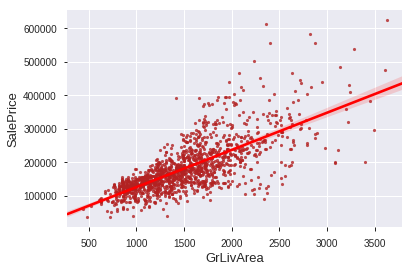

In [78]:
fig, ax = plt.subplots()
ax= sns.regplot(df_Train['GrLivArea'], df_Train['SalePrice'], scatter_kws={"color": "firebrick", 's': 10}, line_kws={"color": "red"})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

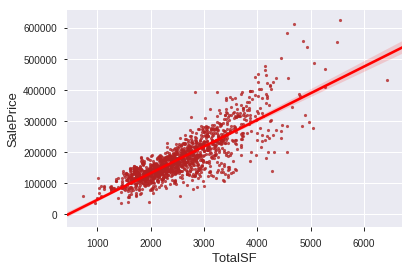

In [79]:
fig, ax = plt.subplots()
ax= sns.regplot(df_Train['TotalSF'], df_Train['SalePrice'], scatter_kws={"color": "firebrick", 's': 10}, line_kws={"color": "red"})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalSF', fontsize=13)
plt.show()

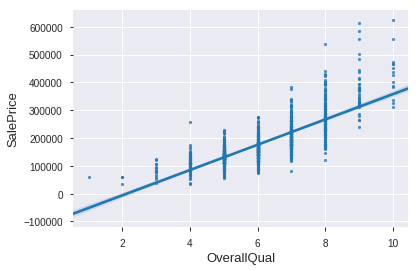

In [80]:
fig, ax = plt.subplots()
ax = sns.regplot(df_Train['OverallQual'], df_Train['SalePrice'], scatter_kws={'s': 10})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

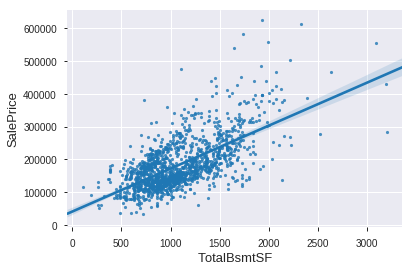

In [88]:
fig, ax = plt.subplots()
ax = sns.regplot(df_Train['TotalBsmtSF'], df_Train['SalePrice'], scatter_kws={'s': 10})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

In [89]:
lm2 = LinearRegression()
sale2 = df_Train.loc[~df_Train.isnull().any(axis=1)] # how to remove the rows with missingness
lm2.fit(df_Train[['SalePrice']], df_Train['GrLivArea'])
print('intercept %.2f' %(lm2.intercept_))
print('slope %.4f' %(lm2.coef_))

intercept 659.44
slope 0.0047


# OLS

In [90]:
lm2 = LinearRegression()
sale2 = dftrain.loc[~dftrain.isnull().any(axis=1)] # how to remove the rows with missingness
lm2.fit(dftrain[['GrLivArea']], dftrain['SalePrice'])
print('intercept %.2f' %(lm2.intercept_))
print('slope %.4f' %(lm2.coef_))

intercept 13859.79
slope 111.2544


In [91]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [92]:
features = sm.add_constant(df_Train[['GrLivArea']])
ols_sm   = OLS(df_Train.SalePrice, features)
model    = ols_sm.fit()

In [93]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     1540.
Date:                Sat, 23 Nov 2019   Prob (F-statistic):          1.36e-228
Time:                        18:10:11   Log-Likelihood:                -17437.
No. Observations:                1418   AIC:                         3.488e+04
Df Residuals:                    1416   BIC:                         3.489e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.386e+04   4512.376      3.072      0.0

# Data Prep for SML

In [94]:
df_Train.SalePrice = np.log1p(df_Train.SalePrice)
y = df_Train.SalePrice

/home/arlisscoates/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [95]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df_Train.select_dtypes(include = ["object"]).columns
numerical_features = df_Train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_Train_num = df_Train[numerical_features]
df_Train_cat = df_Train[categorical_features]

Numerical features : 176
Categorical features : 0


In [96]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(df_Train_num.isnull().values.sum()))
df_Train_num = df_Train_num.fillna(df_Train_num.median())
print("Remaining NAs for numerical features in train : " + str(df_Train_num.isnull().values.sum()))

NAs for numerical features in train : 0
Remaining NAs for numerical features in train : 0


In [97]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = df_Train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df_Train_num[skewed_features] = np.log1p(df_Train_num[skewed_features])

161 skewed numerical features to log transform


In [98]:
# Concatenates the categoral and numericals
df_Train = pd.concat([df_Train_num, df_Train_cat], axis=1)
print("New number of features : " + str(df_Train.shape[1]))


New number of features : 176


In [99]:
## Separates into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(df_Train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (992, 176)
X_test : (426, 176)
y_train : (992,)
y_test : (426,)


In [100]:
# Standardize
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

/home/arlisscoates/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [101]:
# Define error measure for official scoring : RMSE
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

# Simple linear regression

RMSE on Training set : 157317816318.5966
RMSE on Test set : 647920738141.0603


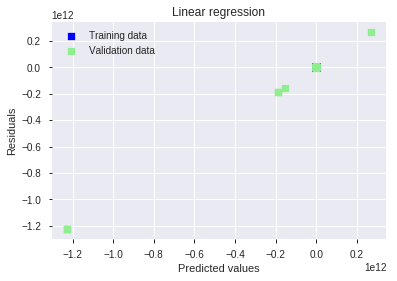

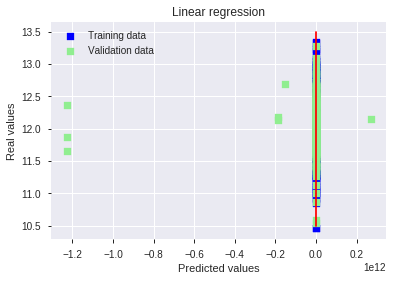

In [102]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [103]:
# Linear regression with regularization

In [104]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [105]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

ridge.set_params(alpha=45)
ridge.fit(X_train, y_train)
coefDF = pd.Series(ridge.coef_, index=X_train.columns)
print('The intercept is %.4f' %(ridge.intercept_))
print('The slopes are %s' %(coefDF))

The intercept is 12.0371
The slopes are 1stFlrSF          0.025
2ndFlrSF          0.020
3SsnPorch         0.005
BedroomAbvGr     -0.013
BsmtFinSF1        0.026
BsmtFinSF2       -0.001
BsmtFullBath      0.004
BsmtHalfBath      0.001
BsmtUnfSF        -0.008
EnclosedPorch     0.002
Fireplaces        0.016
FullBath          0.006
GarageArea        0.014
GarageCars        0.015
GrLivArea         0.059
HalfBath          0.008
KitchenAbvGr     -0.010
LotArea           0.042
LotFrontage       0.015
LowQualFinSF      0.004
MSSubClass       -0.003
MasVnrArea        0.007
MiscVal           0.001
MoSold           -0.001
OpenPorchSF       0.004
OverallCond       0.048
OverallQual       0.065
PoolArea          0.008
RecreationArea   -0.001
ScreenPorch       0.011
                  ...  
Plywood          -0.007
Stucco           -0.000
VinylSd           0.003
Wd Sdng          -0.007
WdShing          -0.001
Brk Cmn           0.003
CmentBd           0.002
Other             0.000
Wd Shng           0.002


In [118]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,2,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=True, max_iter=2000)  
    lasso.fit(trainX, trainY)
    train_R2.append(lasso.score(X_train, y_train))
    test_R2.append(lasso.score(X_test, y_test))

ValueError: Invalid parameter alpha for estimator LassoCV(alphas=[0.0018, 0.0019500000000000001, 0.0021, 0.0022500000000000003, 0.0024000000000000002, 0.00255, 0.0027, 0.00285, 0.003, 0.00315, 0.0033000000000000004, 0.00345, 0.00375, 0.0039000000000000003, 0.004050000000000001, 0.0042],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 36.0
Ridge RMSE on Training set : 0.11500411851858894
Ridge RMSE on Test set : 0.13460288842319934


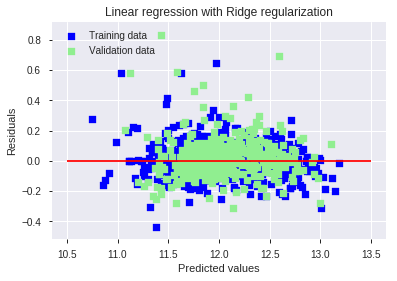

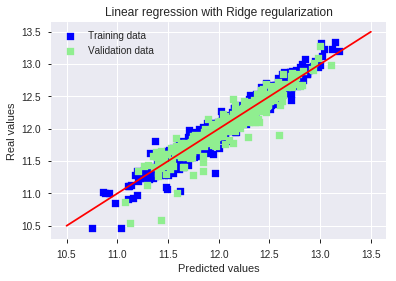

Ridge picked 168 features and eliminated the other 8 features


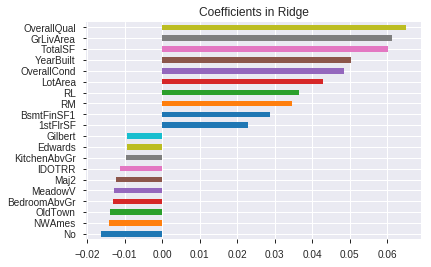

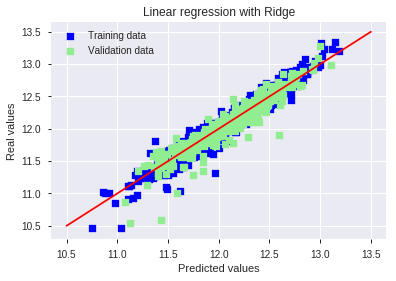

Ridge picked 168 features and eliminated the other 8 features


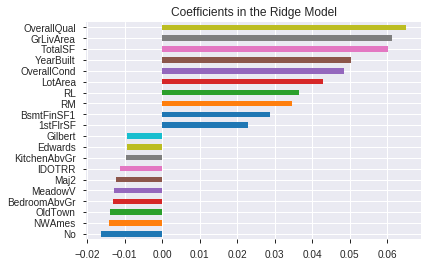

In [106]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in Ridge")
plt.show()# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [107]:
#  LASSO regression

Best alpha : 0.003
Try again for more precision with alphas centered around 0.003
Best alpha : 0.00255
Lasso RMSE on Training set : 0.1110142377875637
Lasso RMSE on Test set : 0.13723144859891395


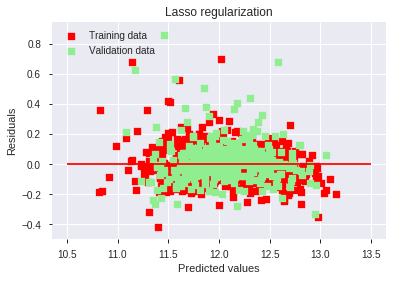

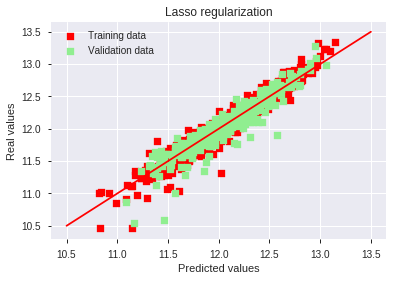

Lasso picked 89 features and eliminated the other 87 features


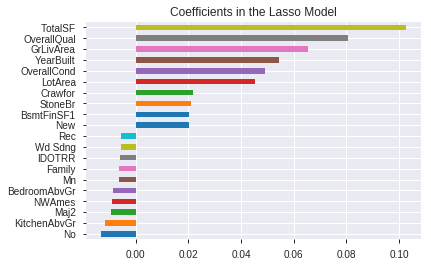

In [119]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
ls = lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "red", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "red", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

Best l1_ratio : 0.1
Best alpha : 0.03
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.03
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.03
Best l1_ratio : 0.085
Best alpha : 0.028499999999999998
ElasticNet RMSE on Training set : 0.11098632784061169
ElasticNet RMSE on Test set : 0.13621340653716857


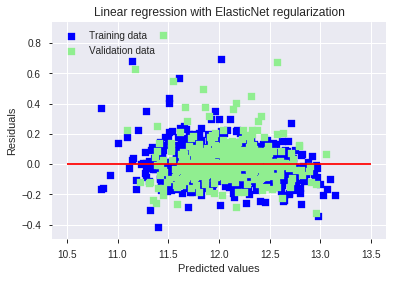

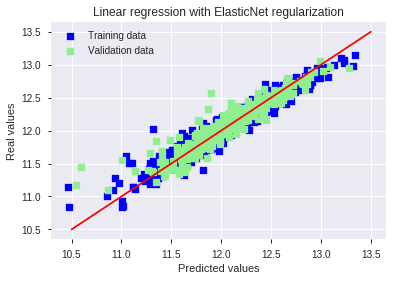

ElasticNet picked 94 features and eliminated the other 82 features


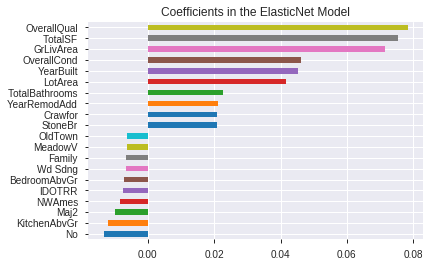

In [109]:
# Elasticnet

elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [ ]:
ls

In [110]:
# Random forest

In [111]:
def get_error(X_train, y_train, X_test, y_test, model, show = True):
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    test_error  = 1 - model.score(X_test, y_test)
    if show:
        print("The training error is: %.5f" %train_error)
        print("The test     error is: %.5f" %test_error)
    return [train_error, test_error]

In [112]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

In [113]:
X_train, X_test, y_train, y_test = train_test_split(dftrain_cat, oj_target, test_size=0.2, random_state=0)

NameError: name 'dftrain_cat' is not defined

In [ ]:
# (1) fit the initial model on the training set
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
print("Training error: " + str(1-tree_model.score(X_train, y_train)))
print("Test error: " + str(1-tree_model.score(X_test, y_test)))

In [ ]:
# or using get_error function for automatic computation
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()
get_error(X_train, y_train, X_test, y_test, tree_model)

In [ ]:
import sklearn.model_selection as ms
#run a grid search to find error rates for max_depths ranging 1-30
grid_para_tree = [
    {'max_depth': range(1, 31)}
]

tree_model.set_params(random_state=0)
grid_search_tree = ms.GridSearchCV(tree_model, grid_para_tree, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)
grid_search_tree.fit(X_train, y_train)

In [ ]:
# create lists of the test/training error ranges
test_error_range  = [1 - x for x in grid_search_tree.cv_results_['mean_test_score']]
train_error_range = [1 - x for x in grid_search_tree.cv_results_['mean_train_score']]